# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План работы:
 1. Открытие файла с данными и изучение общей информацию. 
 2. Предобработка данных
 3. Исследовательский анализ данных
 4. Выводы

### Открытие файла с данными и изучение общей информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # импортируем необходимые нам библиотеки


In [2]:
#считали датасет и вывели информацию о нем
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head() #вывели первые 5 строк датасета

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

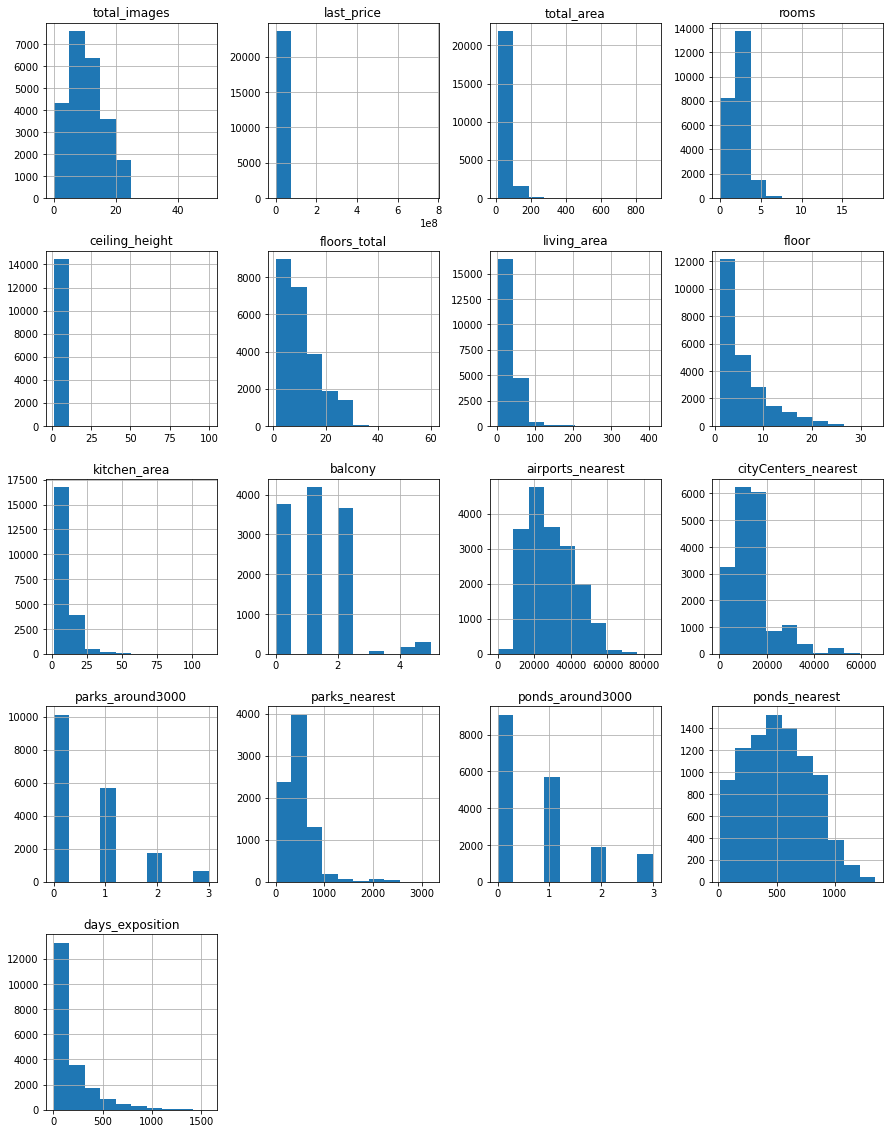

In [5]:
data.hist(figsize=(15, 20)) #строим гистограмму

Проанализировав датасет выделим следуюшие пробелмы:
стобец cityCenters_nearest нужно привести к общепринятому виду
во многих столбцах есть пропуски ,нужно быть их проанализировать и по возможности эти пропуски заполнить
Мы видим аномальные значения в столбцах с высотой потолков и ценой квартиры. Нужно будет изучить эти выбросы.

### Предобработка данных

Сразу видим, что название столбца `cityCenters_nearest` нужно переименовать

In [6]:
data = data.rename( columns={'cityCenters_nearest': 'city_centers_nearest'})

In [7]:
#Избавимся от пропусков в столбце ceiling_height, заменив их медианным значением высоты потолков
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print(data['ceiling_height'].isna().sum()) #выведем количество пропущенных значений


0


In [8]:
#Изучим пропуски в графе floors_total
print(data['floors_total'].unique())
print(data['floors_total'].isna().sum())   

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]
86


Удалим строки с пропусками в этажности

In [9]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

print(data['floors_total'].isna().sum()) #Проверим осттались ли пропуски

0


Мы видим, что есть пропущенные данные в столбцы с жилой площадью квартиры. Заполнить эти данные просто медианныеми значениями будет некорректно, так как может оказаться, что медианное значение больше, чем общая площадь квартиры. Поступим следующим образом:
Для тех квартир, где неизвестно площадь жилой комнаты и площадь кухни, найдем отношение медианного значения жилой площади к медианному значению общей площади, сгруппированными по колисчеству комнат в квартире. Заполним пропущенные значения частным общей площади к медианному соотношению

In [10]:
data['living_area'] = data['living_area'].fillna(0)
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data.loc[(data['living_area'] == 0) & (data['kitchen_area'] == 0),'living_area'] = (
    data.loc[(data['living_area'] == 0), 'total_area'] * 
    (data.groupby('rooms')['living_area'].transform('median') / data.groupby('rooms')['total_area'].transform('median'))
)

Для квартир, где жилая площадь неизвестна, но известна площадь кухни, рассчитаем медианное значение оставшегося пространства(медиана общей площади за вычетом медианы кухни. Разделив медиану жилой зоны на медиану оставшегося пространства получим процент жилой зоны от оставшегося пространства. От общей площади вычитаем площадь кухни и умножаем на процент, который занимает спальная зона.

In [11]:
data.loc[(data['living_area'] == 0) & (data['kitchen_area'] != 0), 'living_area_area'] = (
    (data.loc[(data['living_area'] == 0) & (data['kitchen_area'] != 0),'total_area'] - 
    data.loc[(data['living_area'] == 0) & (data['kitchen_area'] != 0), 'kitchen_area']) * 
    (data.groupby('rooms')['living_area'].transform('median') / 
    (data.groupby('rooms')['total_area'].transform('median') - data.groupby('rooms')['kitchen_area'].transform('median')) )
)

Пропущенные значения кухни найдем следующим образом: рассчитаем медианное значение оставшегося пространства(медиана общей площади за вычетом жилой зоны. Разделив медиану кухни на медиану оставшегося пространства получим процент кухни от оставшегося пространства. От общей площади вычитаем площадь спального пространства и умножаем на процент, который занимает кухня. Но есть условия ,что для комнат = 0, площадь кухни будет тоже 0. Данный способ рассчета позволяет исключить заполнение пропусков значениями, при которых сумма жилой площади и кухни будет больше площади квартиры

In [12]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data.loc[(data['kitchen_area'] == 0) & (data['rooms'] != 0), 'kitchen_area'] = (
    (data.loc[(data['kitchen_area'] == 0) & (data['rooms'] != 0),'total_area'] - 
    data.loc[(data['kitchen_area'] == 0) & (data['rooms'] != 0), 'living_area']) * 
    (data.groupby('rooms')['kitchen_area'].transform('median') / 
    (data.groupby('rooms')['total_area'].transform('median') - data.groupby('rooms')['living_area'].transform('median')) )
)


Поработаем со столбцом is_apartment

In [13]:
print(data['is_apartment'].unique()) #вывели уникальные значения
data['is_apartment'] = data['is_apartment'].fillna(False) #заменили пусты значения на False
print(data['is_apartment'].unique())

[nan False True]
[False  True]


Теперь посмотрим на пропуске в столбце "балконы"

In [14]:
print(data['balcony'].unique())
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].isna().sum())


[nan  2.  0.  1.  5.  4.  3.]
0


Пропуски в сотлбце locality_name мы вынуждены удалить, потому что отсутствие информации о насленном пункте не дает нам полноту картины, если мы не знаем, где продавалась квартира, то мы не сможем сделать по ним какие-то выводы

In [15]:

data = data.dropna(subset=['locality_name']).reset_index(drop=True)
print(data['locality_name'].unique()) #посмотрим уникальные названия населенных пунктов в поиске неявных дубликатов



['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Исправим букву ё в названиях на е

In [16]:
i=0
symbol = 'ё'
for i in range(len(data)):
    if symbol in data.loc[i,'locality_name']:
        data.loc[i,'locality_name'] = data.loc[i,'locality_name'].replace('ё','e')
       
    i+=1
print(data['locality_name'].unique()) 

['Санкт-Петербург' 'посeлок Шушары' 'городской посeлок Янино-1'
 'посeлок Парголово' 'посeлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фeдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посeлок Металлострой'
 'посeлок городского типа Лебяжье' 'посeлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посeлок Аннино' 'поселок городского типа Ефимовский'
 'посeлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посeлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посeлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Посмотрим на название населенных пунктов, в объявлений которых не указано расстояние до центра

In [17]:
print(data.loc[data['city_centers_nearest'].isna() == True, 'locality_name'].unique())


['городской посeлок Янино-1' 'посeлок Мурино' 'Сертолово'
 'деревня Кудрово' 'Коммунар' 'поселок городского типа Красный Бор'
 'Гатчина' 'поселок Мурино' 'деревня Фeдоровское' 'Выборг' 'Кировск'
 'деревня Новое Девяткино' 'Санкт-Петербург'
 'посeлок городского типа Лебяжье' 'посeлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'деревня Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'деревня Куттузи' 'посeлок Аннино'
 'поселок городского типа Ефимовский' 'посeлок Плодовое'
 'деревня Заклинье' 'поселок Торковичи' 'поселок Первомайское' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посeлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Сосновый Бор' 'поселок Новый Свет' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'посeлок Бугры' 'поселок Бугры'
 'поселок городского типа Рощино' 'Кириши' 'Луга' 'Волосово' 'Отрадное'
 'село Павлово' 

Мы можем сделать выводы ,что данные по расстояние д оцентра города на этих объявлениях не получены автоматически, так как квартиры находятся в сельской местности и не относятся к Санкт-Петербургу. Оставим эти значения пустыми. Тоже самое и с другими показателями, которые считались в автоматическом режиме.
Пропуски в показатели days_exposition могут означать, что квартиры не были проданы и были перемещены в архив. Удаалим эти значения.

In [18]:
data = data.dropna(subset=['days_exposition']).reset_index(drop=True)

Откроем еще раз info() и изучим типы данных объектов

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20394 non-null  int64  
 1   last_price            20394 non-null  float64
 2   total_area            20394 non-null  float64
 3   first_day_exposition  20394 non-null  object 
 4   rooms                 20394 non-null  int64  
 5   ceiling_height        20394 non-null  float64
 6   floors_total          20394 non-null  float64
 7   living_area           20394 non-null  float64
 8   floor                 20394 non-null  int64  
 9   is_apartment          20394 non-null  bool   
 10  studio                20394 non-null  bool   
 11  open_plan             20394 non-null  bool   
 12  kitchen_area          20394 non-null  float64
 13  balcony               20394 non-null  float64
 14  locality_name         20394 non-null  object 
 15  airports_nearest   

В столбце first_day_exposition  тип данных object, а должен быть datetime64, так же поменяем тип данных в столбцах floors_total , balcony и days_exposition и выведем еще раз на экран информацию о дата сете

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20394 non-null  int64         
 1   last_price            20394 non-null  float64       
 2   total_area            20394 non-null  float64       
 3   first_day_exposition  20394 non-null  datetime64[ns]
 4   rooms                 20394 non-null  int64         
 5   ceiling_height        20394 non-null  float64       
 6   floors_total          20394 non-null  int64         
 7   living_area           20394 non-null  float64       
 8   floor                 20394 non-null  int64         
 9   is_apartment          20394 non-null  bool          
 10  studio                20394 non-null  bool          
 11  open_plan             20394 non-null  bool          
 12  kitchen_area          20394 non-null  float64       
 13  balcony         

Проверим наличие явных дубликатов

In [21]:
data.duplicated().sum()

0

Изучим данные в столбцах, чтобы поискать возможные аномалии

In [22]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_area
count,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,15735.000000,15757.000000,15757.000000,6887.000000,15757.000000,7822.000000,20394.000000,351.000000
mean,9.631362,6.263722e+06,58.834265,2.024370,2.715801,10.863293,32.951607,5.973767,10.211827,0.594440,28842.391293,14293.660024,0.600558,490.827065,0.759853,520.541294,180.741395,36.823485
std,5.658712,1.088858e+07,34.066200,1.055162,0.972956,6.649703,21.771255,4.931607,5.678553,0.950411,12709.468916,8563.404898,0.797699,344.650064,0.932315,277.416834,219.732782,27.607557
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000,12.014409
25%,6.000000,3.400000e+06,39.500000,1.000000,2.600000,5.000000,18.000000,2.000000,7.000000,0.000000,18490.000000,9486.000000,0.000000,287.000000,0.000000,299.000000,45.000000,20.330660
50%,9.000000,4.500000e+06,50.800000,2.000000,2.650000,9.000000,29.533585,4.000000,9.000000,0.000000,26786.000000,13165.000000,0.000000,451.000000,0.000000,505.000000,95.000000,30.874236
75%,14.000000,6.500000e+06,67.800000,3.000000,2.700000,16.000000,41.000000,8.000000,11.500000,1.000000,37407.000000,16366.000000,1.000000,613.000000,1.000000,732.000000,231.000000,42.473031
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,122.715419,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,340.257023


Минимальное значение стоимости квартиры указано 12190 рублей, очевидно, что была опечатка. посмотрим последние 10 значений стоимости квартиры:

In [23]:
data['last_price'].sort_values(ascending = True).head(10)

7574      12190.0
12835    430000.0
14020    440000.0
4893     450000.0
15223    450000.0
8247     450000.0
13971    450000.0
16246    470000.0
20212    470000.0
18858    470000.0
Name: last_price, dtype: float64

Выведем информацию о квартире с минимальной стоимостью

In [24]:
data.query('last_price == 12190')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_area
7574,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8,NaN


2-х комнатная квартира в Санк-Петербурге. Скорее всего автор имел ввиду цену 12190000, исправим это

In [25]:
data.loc[data['last_price'] == 12190,'last_price'] = data.loc[data['last_price']== 12190, 'last_price'] * 1000
data['last_price'].describe()

count    2.039400e+04
mean     6.264319e+06
std      1.088857e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

У потолков есть аномально низкие и выские значения

In [26]:
print(data.sort_values('ceiling_height')['ceiling_height'].head(15))

                              

19432    1.00
4903     1.20
14589    1.75
5027     2.00
3599     2.00
9760     2.00
471      2.00
17670    2.00
14545    2.00
16655    2.00
16448    2.00
10980    2.20
15324    2.25
4723     2.30
1371     2.30
Name: ceiling_height, dtype: float64


In [27]:
data.loc[data['ceiling_height'] <=2,'ceiling_height'] = data['ceiling_height'].median()#Заменим потолки ниже 2 метров медианными значениями


In [28]:
data.loc[data['ceiling_height'] >20,'ceiling_height'] = data.loc[data['ceiling_height'] >20,'ceiling_height'] / 10
#Предположим, что в потолках выше 20 метров просто опечатка и разделим эти значения на 10

Чтобы получить более точную информацию уберем редкие выбивающиеся занчения для столбцов rooms и total_area

In [29]:
data = data.query('total_area < 200').reset_index(drop=True)
data = data.query('rooms <= 10').reset_index(drop=True)

### Посчитайте и добавьте в таблицу новые столбцы

Добавим квадратные метры

In [30]:
data['square meter'] = data['last_price'] / data['total_area']

In [31]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_area,square meter
0,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,посeлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,NaN,82920.792079
1,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,NaN,92785.714286
2,0,64900000.0,159.0,2015-07-24,3,2.65,14,96.032944,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,NaN,408176.100629
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,NaN,100000.000000
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.400000,5,False,...,городской посeлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN,95065.789474


In [32]:
data['city_centers_nearest_kilometrs'] = data['city_centers_nearest'] / 1000 #добавим расстояни от центра города в километрах
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_area,square meter,city_centers_nearest_kilometrs
0,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81,NaN,82920.792079,18.603
1,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558,NaN,92785.714286,13.933
2,0,64900000.0,159.0,2015-07-24,3,2.65,14,96.032944,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424,NaN,408176.100629,6.800
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121,NaN,100000.000000,8.098
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.400000,5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN,95065.789474,NaN


In [33]:
data['weekday'] = data['first_day_exposition'].dt.weekday #добавили столбец с днями недели


In [34]:
data['month'] = data['first_day_exposition'].dt.month #Добавили столбец с месяцами

In [35]:
data['year'] = data['first_day_exposition'].dt.year #добавили столбец с годами

In [36]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_area,square meter,city_centers_nearest_kilometrs,weekday,month,year
0,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,0.0,NaN,81,NaN,82920.792079,18.603,1,12,2018
1,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90.0,2.0,574.0,558,NaN,92785.714286,13.933,3,8,2015
2,0,64900000.0,159.0,2015-07-24,3,2.65,14,96.032944,9,False,...,84.0,3.0,234.0,424,NaN,408176.100629,6.800,4,7,2015
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1.0,48.0,121,NaN,100000.000000,8.098,1,6,2018
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.400000,5,False,...,NaN,NaN,NaN,55,NaN,95065.789474,NaN,0,9,2018


Сделаем функцию ,которая добавляет категорию этажа в зависимости от этажа и этажности дома

In [37]:
def floor_type(row):
    if row['floor'] == 1:
        category_floor = 'первый'
        return category_floor
    if row['floor'] == row['floors_total']:
        category_floor = 'последний'
        return category_floor
    if (row['floor'] != 1 and row['floor'] < row['floors_total']):
        category_floor = 'другой'
        return category_floor
    
row_values = [1,5]
row_columns = ['floor', 'floors_total']
row = pd.Series(data=row_values, index=row_columns)

data['category_floor'] = data.apply(floor_type, axis=1)
data['category_floor'].head()    

0    первый
1    другой
2    другой
3    другой
4    другой
Name: category_floor, dtype: object

### Исследовательский анализ данных

In [ ]:
data.boxplot(column=['total_area']) # построим диаграму размаха

In [40]:
data['total_area'].describe() #изучим значения

count    20215.000000
mean        56.849102
std         25.354109
min         12.000000
25%         39.400000
50%         50.400000
75%         67.000000
max        199.200000
Name: total_area, dtype: float64

In [41]:
data['total_area'].value_counts() 

45.00     385
42.00     339
31.00     319
44.00     311
60.00     308
         ... 
99.70       1
65.89       1
132.40      1
38.51       1
55.06       1
Name: total_area, Length: 1865, dtype: int64

Уберем большие значения, которые выше верхнего уса (больше 125 кв.м.) и построим новую гистограмму

<AxesSubplot:>

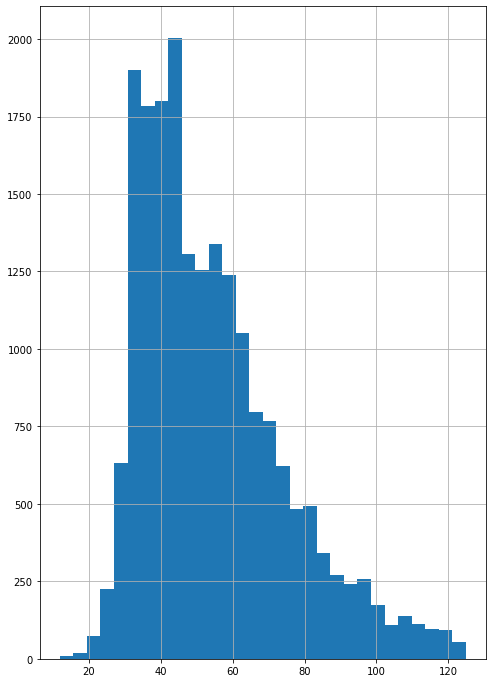

In [42]:
data.query('total_area<125')['total_area'].hist(bins=30, figsize = (8,12))

Чаще всего продавались квартиры площадью 45 кв.м., а медианное значение равно 50 кв.м. Стандартное отклонение равно 25,36, что связано с наличием аномальных больших выбросов. Гистограмма стремится к нормальному рсапределению

Проанализируем жилую площадь

<AxesSubplot:>

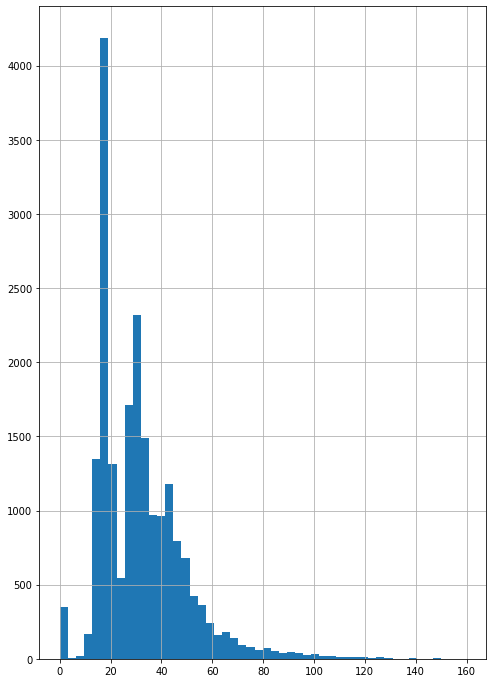

In [43]:
data['living_area'].hist(bins=50, figsize = (8,12))

<AxesSubplot:>

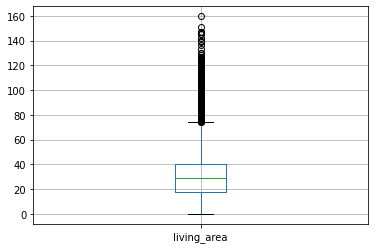

In [44]:
data.boxplot(column=['living_area'])

In [45]:
data['living_area'].describe()

count    20215.000000
mean        31.804276
std         17.130558
min          0.000000
25%         18.000000
50%         29.400000
75%         40.600000
max        159.600000
Name: living_area, dtype: float64

In [46]:
data['living_area'].value_counts()

18.00    799
17.00    613
30.00    527
16.00    451
20.00    440
        ... 
15.37      1
26.28      1
10.76      1
28.77      1
16.74      1
Name: living_area, Length: 2059, dtype: int64

Чаще всего продавались квартиры жтлой площадью 18 кв.м., вероятно, это студии и небольшие 1 комнатные квартиры, медианное значение равно 29,78 кв.м. Стандартное отклонение равно 16,96, разброс в зхначениях довольно большой, что связано с большим разнообразием планировок и жилых площадей на рынке. Гистограмма стремится к нормальному рсапределению

Изучим площадь кухни

<AxesSubplot:>

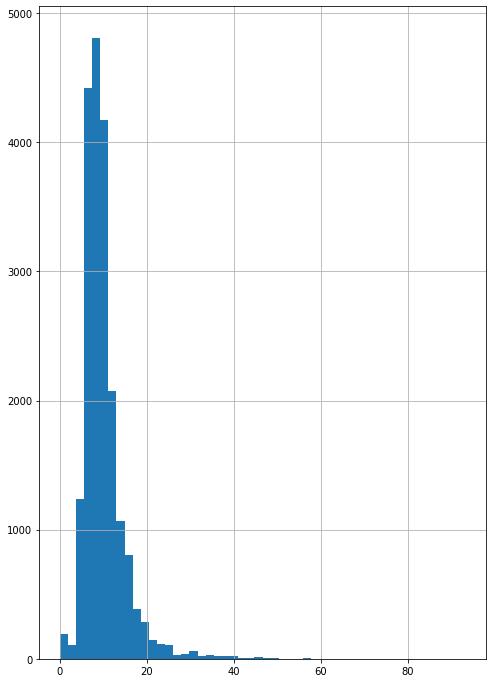

In [47]:
data['kitchen_area'].hist(bins=50, figsize = (8,12))

<AxesSubplot:>

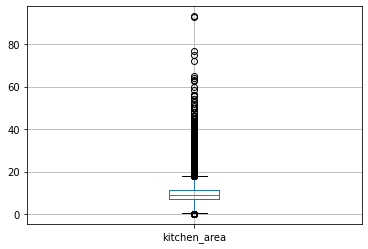

In [48]:
data.boxplot(column=['kitchen_area'])

Уберем большие значения, которые выше верхнего уса (больше 20 кв.м.) и построим новую гистограмму

<AxesSubplot:>

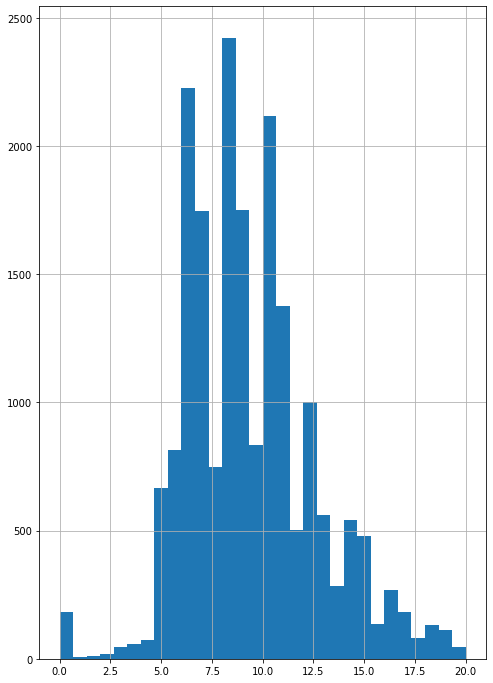

In [49]:
data.query('kitchen_area<20')['kitchen_area'].hist(bins=30, figsize = (8,12))

In [50]:
data['kitchen_area'].describe()

count    20215.000000
mean        10.026388
std          5.041697
min          0.000000
25%          7.000000
50%          9.000000
75%         11.400000
max         93.200000
Name: kitchen_area, dtype: float64

In [51]:
data['kitchen_area'].value_counts()

6.000000     1137
10.000000    1120
8.000000      960
9.000000      955
7.000000      945
             ... 
8.965850        1
7.780000        1
28.640000       1
6.722835        1
16.740000       1
Name: kitchen_area, Length: 1765, dtype: int64

Чаще всего продавались квартиры с кухней 6 кв.м., медианное значение равно 10,03 кв.м. Стандартное отклонение равно 5,04, это значит, что занчения в выборке отличаются от средней площади на 5,04 кв.м. Гистограмма стремится к нормальному рсапределению

Изучим цену продажи

<AxesSubplot:>

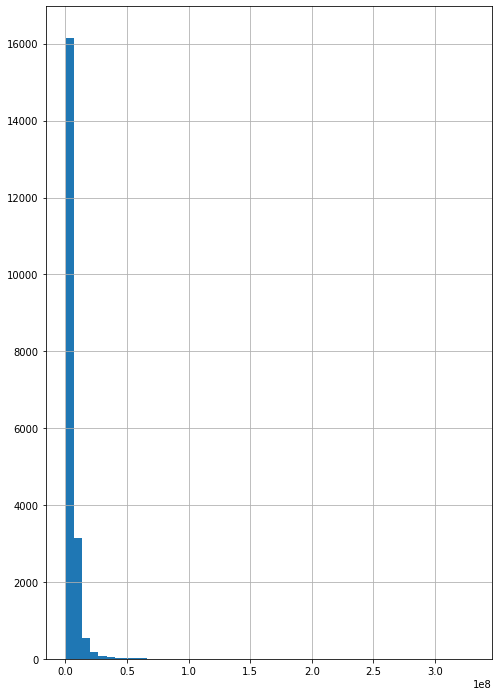

In [52]:
data['last_price'].hist(bins=50, figsize = (8,12))

Сделаем столбец в котором преобразуем в миллионы цену продажи и снова выведем гистограмму

In [53]:
data['last_price_million'] = data['last_price'] / 1000000

<AxesSubplot:>

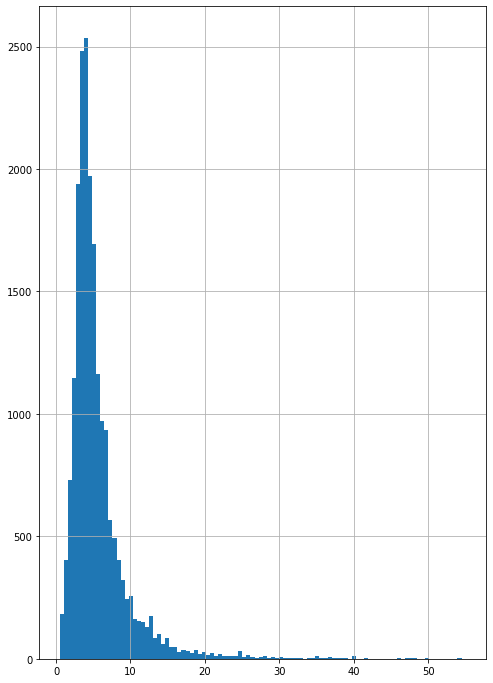

In [54]:
data['last_price_million'].hist(bins=100, figsize = (8,12), range = (0.5, 55))

<AxesSubplot:>

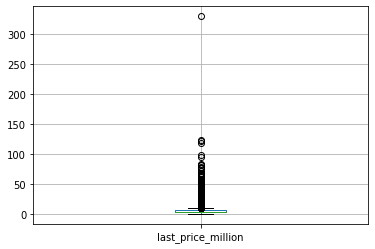

In [55]:
data.boxplot(column=['last_price_million'])

In [56]:
data['last_price_million'].describe()

count    20215.000000
mean         5.761151
std          5.668604
min          0.430000
25%          3.400000
50%          4.500000
75%          6.418750
max        330.000000
Name: last_price_million, dtype: float64

75 процентов значений лежат в промежутки от 430000 до 6420000, но есть аномально большие значения, которые влияют на величину среднего и стандартного отклонения. Оставим значения в промежутке до 100000000. Гистограмма стремится к нормальному рсапределению

In [57]:
data = data.query('last_price_million < 100000000').reset_index(drop=True)

In [58]:
data['last_price'].value_counts()

4500000.0     300
3500000.0     263
4000000.0     238
4200000.0     233
3600000.0     232
             ... 
7297000.0       1
31490000.0      1
690000.0        1
6552700.0       1
4386000.0       1
Name: last_price, Length: 2544, dtype: int64

медианное значение цены продажи равно 5,76 миллиона рубдей . Стандартное отклонение равно 5,66, это значит, что занчения в выборке отличаются от средней цены продажи на 5,66 млн. руб.

Изучим количество комнат

<AxesSubplot:>

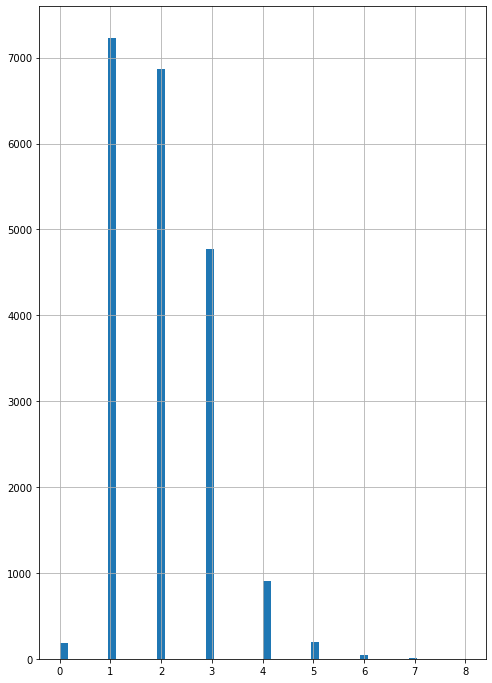

In [59]:
data['rooms'].hist(bins=50, figsize = (8,12))

<AxesSubplot:>

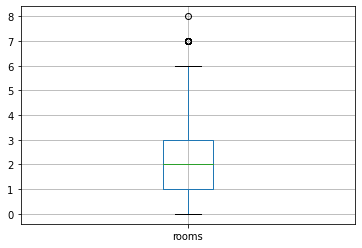

In [60]:
data.boxplot(column=['rooms'])

In [61]:
data['rooms'].describe()

count    20215.000000
mean         1.990799
std          0.972265
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

In [62]:
data['rooms'].value_counts()

1    7234
2    6871
3    4776
4     903
5     197
0     179
6      43
7      11
8       1
Name: rooms, dtype: int64

Чаще всего продавали 1 комнатные квартиры, но медиааное значение равно 2. Гистограмма стремится к нормальному рсапределению

Изучим высоту потолков

<AxesSubplot:>

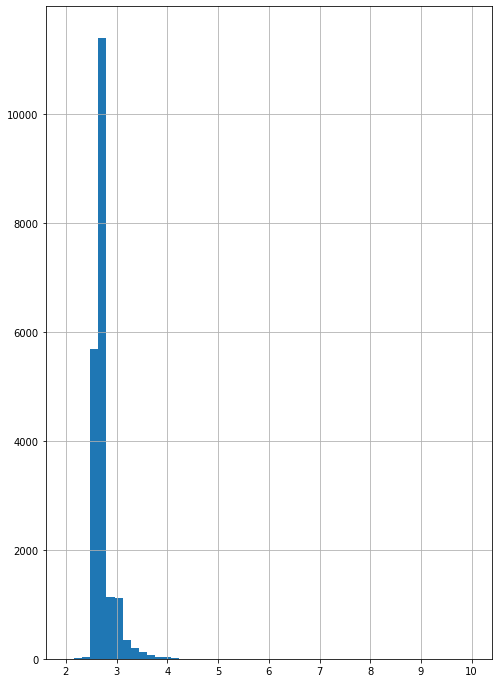

In [63]:
data['ceiling_height'].hist(bins=50, figsize = (8,12), range = (2, 10))

<AxesSubplot:>

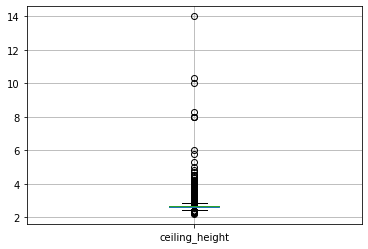

In [64]:
data.boxplot(column=['ceiling_height'])

In [65]:
data['ceiling_height'].describe()

count    20215.000000
mean         2.689408
std          0.239321
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

In [66]:
data['ceiling_height'].value_counts()

2.65     8880
2.50     2891
2.60     1411
2.70     1354
3.00      857
         ... 
4.80        1
4.14        1
3.48        1
10.30       1
3.93        1
Name: ceiling_height, Length: 156, dtype: int64

Чаще всего продают квартиры с потолками 2,65 м, медианное значение цены продажи равно 2,65 м . Стандартное отклонение равно 0,23 , это значит, что занчения в выборке отличаются от средней всего на 0,25 м. Гистограмма стремится к нормальному рсапределению

Изучим этаж

<AxesSubplot:>

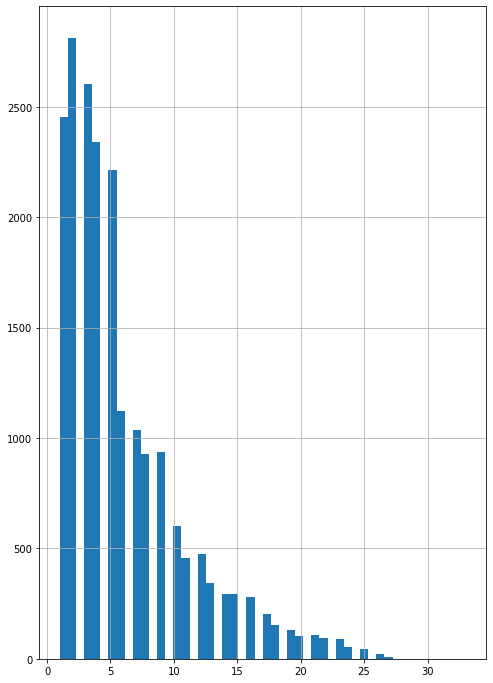

In [67]:
data['floor'].hist(bins=50, figsize = (8,12))

<AxesSubplot:>

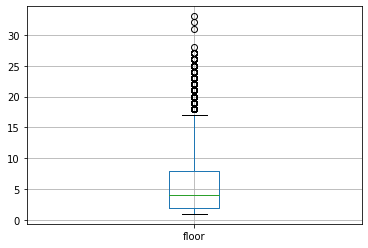

In [68]:
data.boxplot(column=['floor'])

Верхний ус заканчивается около 17 этажей — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Все, что выше считается выбросом, однакомы мы не будем этот выброс удалять, так как в Санкт-Петербурге много высотных многоэтажек, и не учитывать их будет неправильно. Визуально гистограмма похожа на распределение Пуассона

In [69]:
data['floor'].describe()

count    20215.000000
mean         5.984813
std          4.939990
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [70]:
data['floor'].value_counts()

2     2814
3     2603
1     2454
4     2340
5     2215
6     1123
7     1036
9      936
8      928
10     602
12     476
11     458
13     345
15     294
14     293
16     278
17     203
18     155
19     130
21     110
20     103
22      95
23      89
24      55
25      44
26      22
27      10
32       1
28       1
33       1
31       1
Name: floor, dtype: int64

Чаще всего продают квартиры на втором этаже, медианное значение цены продажи равно 4. Стандартное отклонение равно 4,95 , это значит, что занчения в выборке отличаются от средней этажа на 4,95

Изучим категорию этажей

<AxesSubplot:>

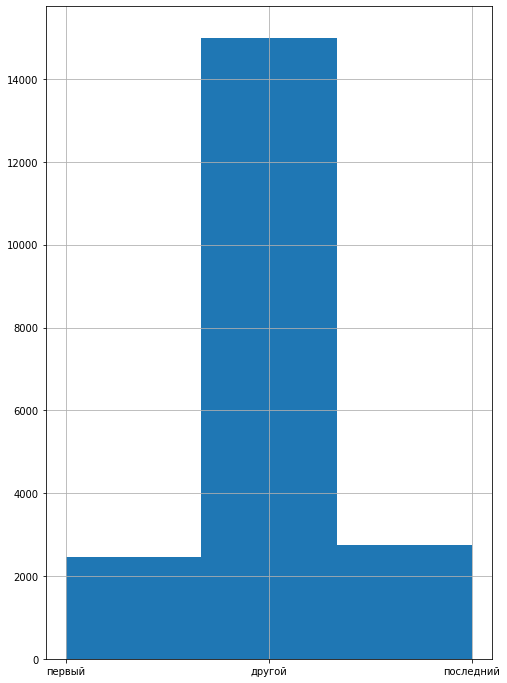

In [71]:
data['category_floor'].hist(bins=3, figsize = (8,12))

In [72]:
data['category_floor'].describe()

count      20215
unique         3
top       другой
freq       15004
Name: category_floor, dtype: object

In [73]:
data['category_floor'].value_counts()

другой       15004
последний     2757
первый        2454
Name: category_floor, dtype: int64

Чаще всего продают квартиры не на первом и не на последнем этаже. Гистограмма стремится к нормальному рсапределению

Изучим общее количество этажей в продаваемых квартирах

<AxesSubplot:>

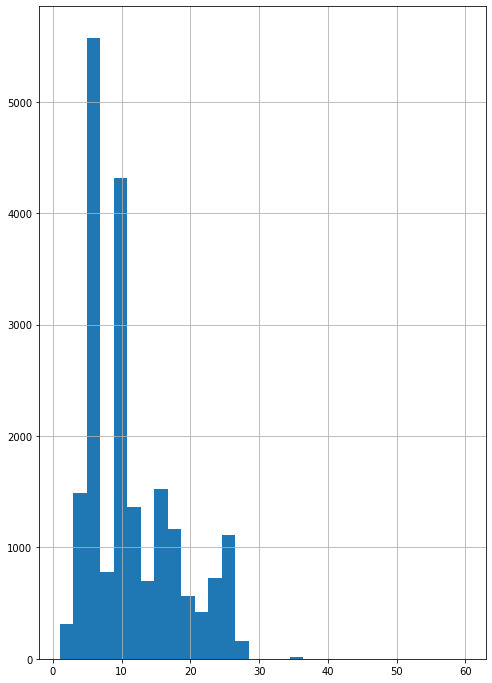

In [74]:
data['floors_total'].hist(bins=30, figsize = (8,12))

<AxesSubplot:>

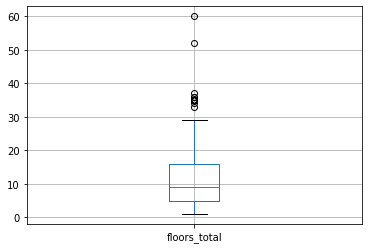

In [75]:
data.boxplot(column=['floors_total'])

In [76]:
data['floors_total'].describe()

count    20215.000000
mean        10.903191
std          6.656357
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [77]:
data['floors_total'].value_counts()

5     4857
9     3293
12    1199
16    1196
10    1020
25     999
4      954
6      720
17     714
3      537
14     492
7      462
18     451
24     410
15     324
8      316
19     313
23     311
2      292
22     264
20     249
13     207
11     162
21     152
27     146
26     112
1       20
35      18
28      17
36       2
37       1
60       1
52       1
29       1
33       1
34       1
Name: floors_total, dtype: int64

Чаще всего продают квартиры на в 5-ти этажных жилых домах, медианное значение равно 9. Стандартное отклонение равно 6,64 , это значит, что занчения в выборке отличаются от средней на 6,64 этажей. По этим данным сложно сделать какой-то вывод, потому что старый жилищный фонд в основном представлет собой 5-9 этажные здания, а новый фонд в основном состоит из высоток. Поэтому, в скором времени, думаю, пик сместится в стороны более высокой этажности зданий.

Изучим расстояние до центра города

<AxesSubplot:>

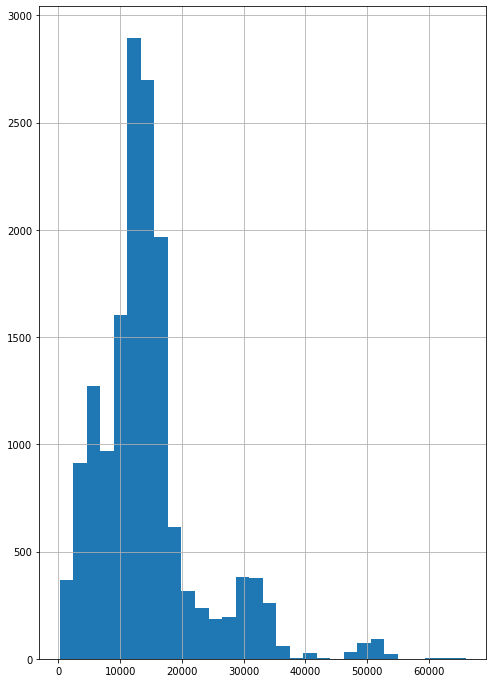

In [78]:
data['city_centers_nearest'].hist(bins=30, figsize = (8,12))

<AxesSubplot:>

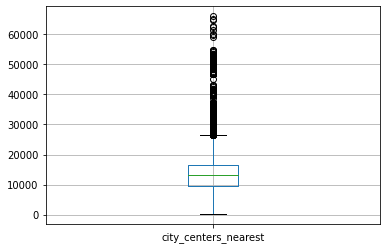

In [79]:
data.boxplot(column=['city_centers_nearest'])

In [80]:
data['city_centers_nearest'].describe()

count    15581.000000
mean     14375.667480
std       8545.376323
min        208.000000
25%       9628.000000
50%      13222.000000
75%      16414.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [81]:
data['city_centers_nearest'].value_counts()

8460.0     44
10720.0    27
8434.0     27
8370.0     26
4844.0     22
           ..
31135.0     1
12461.0     1
6627.0      1
10538.0     1
4234.0      1
Name: city_centers_nearest, Length: 7036, dtype: int64

Чаще всего продают квартиры, которые расположены примерно в 8,5 кв от центра города, медианное значение равно 13222м. Гистограмма стремится к нормальному рсапределению

Изучим расстояние до аэропорта

<AxesSubplot:>

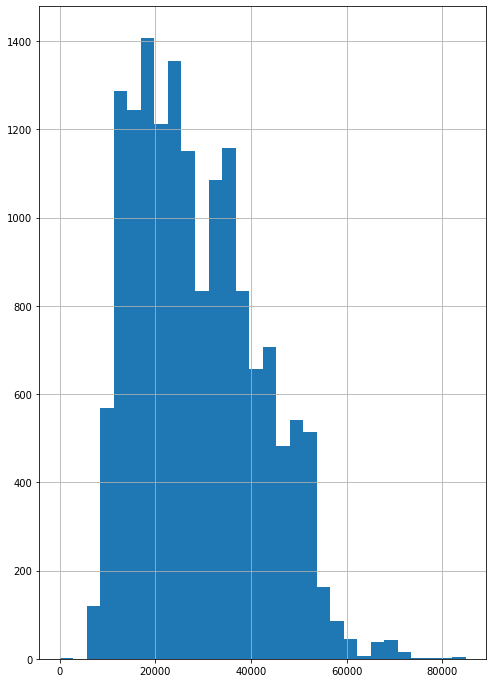

In [82]:
data['airports_nearest'].hist(bins=30, figsize = (8,12))

<AxesSubplot:>

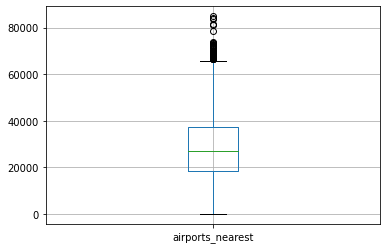

In [83]:
data.boxplot(column=['airports_nearest'])

In [84]:
data['airports_nearest'].describe()

count    15562.000000
mean     28865.784089
std      12751.764640
min          0.000000
25%      18446.000000
50%      26890.000000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [85]:
data['airports_nearest'].value_counts()

37434.0    44
21928.0    29
37407.0    27
39946.0    27
37412.0    24
           ..
34877.0     1
25556.0     1
22730.0     1
32533.0     1
20875.0     1
Name: airports_nearest, Length: 7564, dtype: int64

Чаще всего продают квартиры, которые расположены примерно в 37 км от аэропорта, медианное значение равно 26893м. Гистограмма стремится к нормальному рсапределению

Изучим расстояние до парка

<AxesSubplot:>

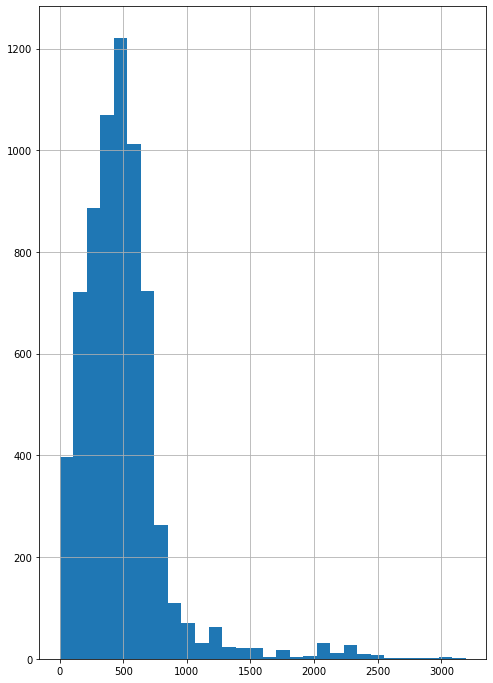

In [86]:
data['parks_nearest'].hist(bins=30, figsize = (8,12))

<AxesSubplot:>

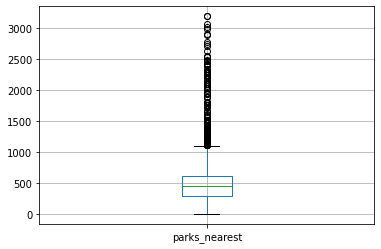

In [87]:
data.boxplot(column=['parks_nearest'])

In [88]:
data['parks_nearest'].describe()

count    6767.000000
mean      491.779814
std       345.271630
min         1.000000
25%       287.000000
50%       454.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [89]:
data['parks_nearest'].value_counts()

441.0     50
392.0     40
456.0     39
173.0     31
2102.0    27
          ..
769.0      1
786.0      1
2555.0     1
730.0      1
929.0      1
Name: parks_nearest, Length: 967, dtype: int64

Чаще всего продают квартиры, которые расположены примерно в 440 от парка, медианное значение равно 453м. Стоить отметить, что 75% продаваемых квартир распологались на расстоянии не больше, чем 614 м от парка Гистограмма стремится к нормальному рсапределению

<AxesSubplot:>

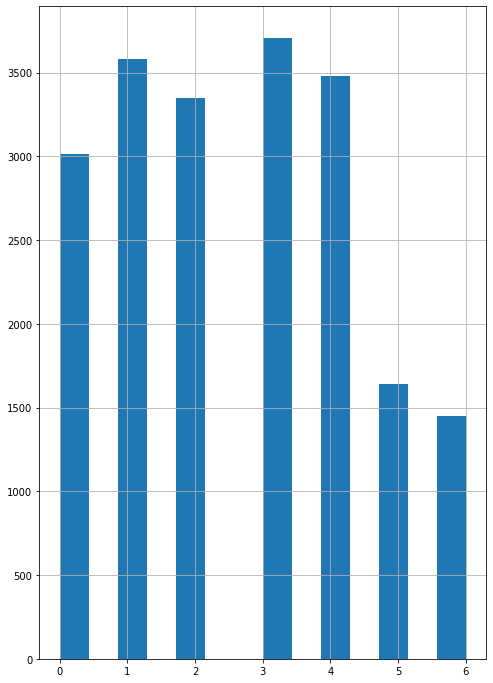

In [90]:
data['weekday'].hist(bins=14, figsize = (8,12))

In [91]:
data['weekday'].describe()

count    20215.000000
mean         2.582439
std          1.783697
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

In [92]:
data['weekday'].value_counts()

3    3709
1    3579
4    3481
2    3348
0    3012
5    1638
6    1448
Name: weekday, dtype: int64

Чаще всего объявления публиковались в четверг. Стоит отметить, что в выходные дни объявления публиковались сильно реже

Изучим в какие месяцы подавались объявления

<AxesSubplot:>

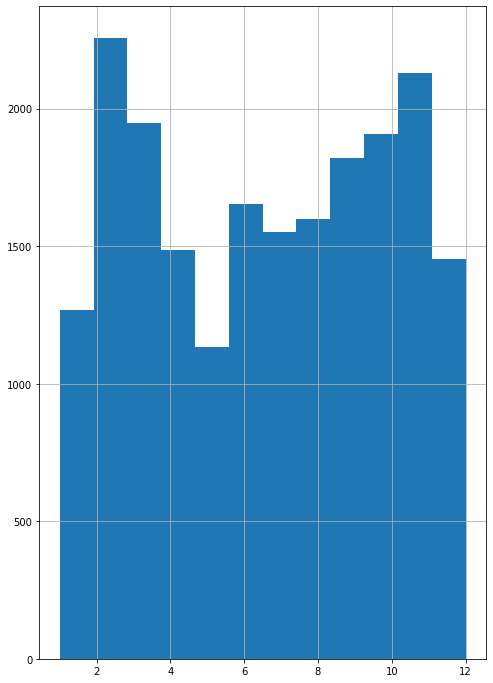

In [93]:
data['month'].hist(bins=12, figsize = (8,12))

In [94]:
data['month'].describe()

count    20215.000000
mean         6.587781
std          3.488153
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

In [95]:
data['month'].value_counts()

2     2259
11    2129
3     1949
10    1908
9     1820
6     1654
8     1599
7     1551
4     1488
12    1455
1     1268
5     1135
Name: month, dtype: int64

Чаще всего объявления публиковались в феврале и ноябре, реже всего в мае и январе. По месяцам и дням неделя какие-то выводы делать трудно, потому что результаты обусловлены бытовыми процессами, а не математической зависимостью

<AxesSubplot:>

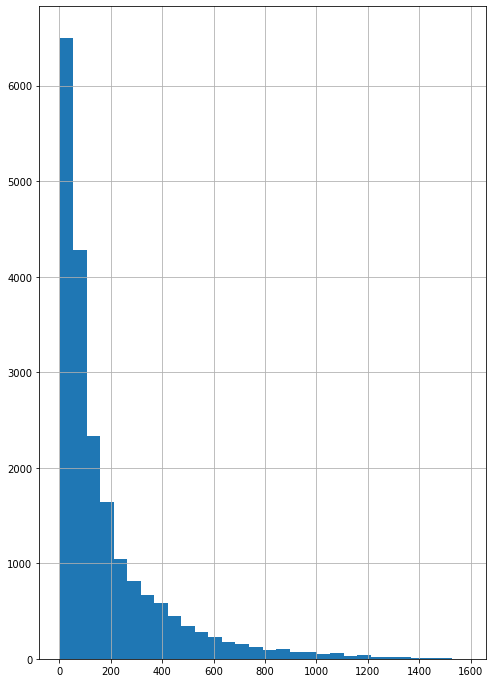

In [96]:
data['days_exposition'].hist(bins=30, figsize = (8,12))

<AxesSubplot:>

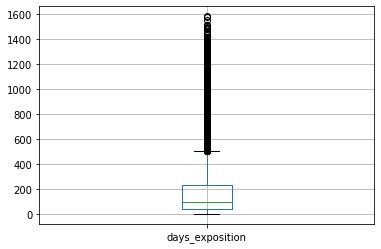

In [97]:
data.boxplot(column=['days_exposition'])

In [98]:
data['days_exposition'].describe()

count    20215.000000
mean       179.510561
std        218.273931
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [99]:
data['days_exposition'].value_counts()

45      879
60      538
7       233
30      207
90      191
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1130, dtype: int64

Чаще всего квартиры продавались за 45 дней, медианное значение равно 95 дней. Первый квартиль равен 45, это значит, что продажи квартиры до 45 можно считать быстрыми, 3 квартель расположен у значения 229 дней - все что больше можно считать долгой продажей.

<AxesSubplot:>

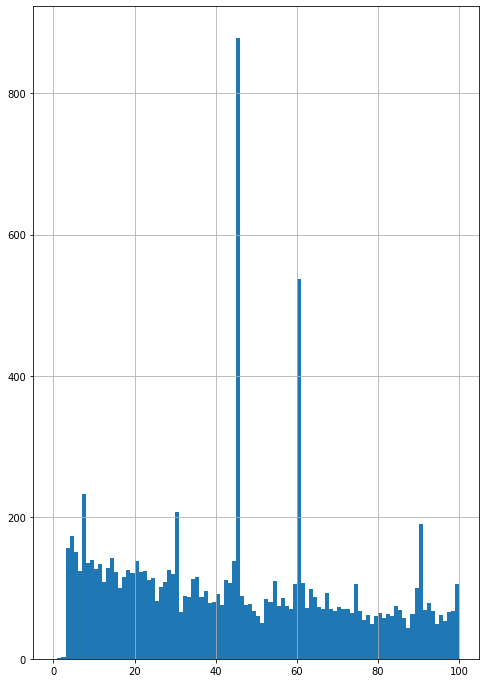

In [100]:
data['days_exposition'].hist(bins=100, figsize = (8,12), range = (0,100))

In [101]:
data.query('days_exposition == 45')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_area_area,square meter,city_centers_nearest_kilometrs,weekday,month,year,category_floor,last_price_million
70,9,4350000.0,37.0,2018-02-22,1,2.65,19,18.000000,6,False,...,NaN,45,NaN,117567.567568,14.192,3,2,2018,другой,4.35
77,9,2500000.0,63.0,2018-10-25,3,2.50,5,43.000000,4,False,...,NaN,45,NaN,39682.539683,NaN,3,10,2018,другой,2.50
96,6,3850000.0,72.3,2017-09-29,2,2.65,3,27.400000,2,False,...,NaN,45,NaN,53250.345781,NaN,4,9,2017,другой,3.85
131,12,4350000.0,55.0,2017-05-21,2,2.57,9,31.200000,2,False,...,NaN,45,NaN,79090.909091,34.425,6,5,2017,другой,4.35
135,15,3100000.0,47.3,2017-11-07,2,2.65,5,27.500000,2,False,...,NaN,45,NaN,65539.112051,NaN,1,11,2017,другой,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20134,10,2900000.0,43.4,2018-01-11,2,2.65,5,24.566038,1,False,...,397.0,45,NaN,66820.276498,14.193,3,1,2018,первый,2.90
20145,4,3950000.0,52.0,2018-03-04,3,2.65,5,31.407001,2,False,...,NaN,45,NaN,75961.538462,21.223,6,3,2018,другой,3.95
20194,9,2450000.0,45.6,2018-02-08,1,2.80,9,21.678689,2,False,...,NaN,45,NaN,53728.070175,NaN,3,2,2018,другой,2.45
20202,0,2500000.0,35.0,2017-12-08,1,2.65,9,16.639344,4,False,...,NaN,45,NaN,71428.571429,NaN,4,12,2017,другой,2.50


Изучим зависимость цены от общей площади

In [102]:
print(data['total_area'].corr(data['last_price_million']))

0.6650437666827153


Коэффициент корреляции 0,67 говорит о наличии связи между общей площадью и ценой продажи, что весьма логично. Уберем выбросы и построим диаграмму рассеивания

<AxesSubplot:xlabel='total_area', ylabel='last_price_million'>

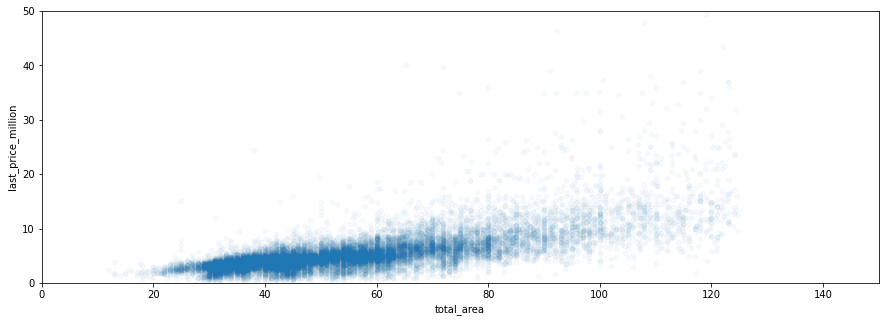

In [103]:
(
    data.query('total_area < 125').
    plot(x='total_area', y='last_price_million', ylim = (0,50), xlim = (0, 150), kind='scatter', alpha=0.03, figsize=(15,5)) 
)

Мы видим ,что с увеличением площади растет и цена ,что говорит о наличии связи

Изучим зависимость цены от жилой площади

In [104]:
print(data['living_area'].corr(data['last_price_million']))

0.529960583311573


Коэффициент корреляции 0,53 говорит о наличии связи между жилой площадью и ценой продажи, но она небольшая. Уберем выбросы и построим диаграмму рассеивания

<AxesSubplot:xlabel='living_area', ylabel='last_price_million'>

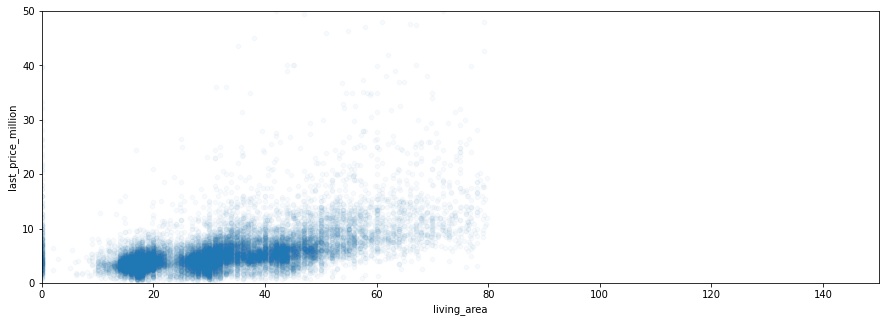

In [105]:
(
    data.query('living_area < 80').
    plot(x='living_area', y='last_price_million', ylim = (0,50), xlim = (0, 150), kind='scatter', alpha=0.03, figsize=(15,5)) 
)

Мы видим,что зависимость видна, но она небольшая

Изучим зависимость цены от площади кухни

In [106]:
print(data['kitchen_area'].corr(data['last_price_million']))

0.5197543493872887


Коэффициент корреляции 0,52 говорит о наличии связи между площадью кухни и ценой продажи, но она небольшая. Уберем выбросы и построим диаграмму рассеивания

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price_million'>

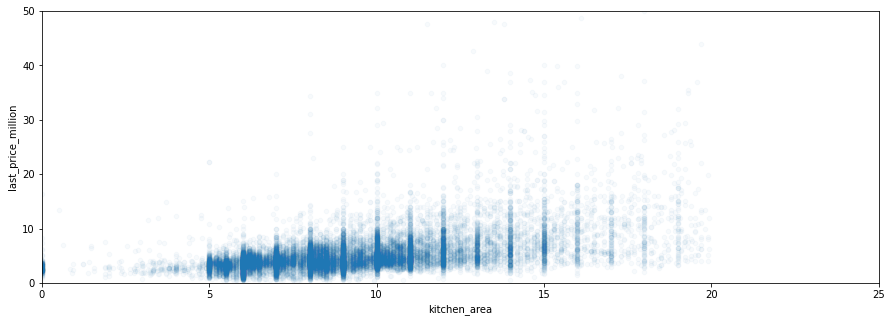

In [107]:
(
    data.query('kitchen_area < 20').
    plot(x='kitchen_area', y='last_price_million', ylim = (0,50), xlim = (0, 25), kind='scatter', alpha=0.03, figsize=(15,5)) 
)

Мы видим,что зависимость видна, но она небольшая

Изучим зависимость цены от количества комнат

In [108]:
print(data['rooms'].corr(data['last_price_million']))

0.38860540404362676


Коэффициент корреляции 0,39 говорит о наличии слабой связи между количеством комнат и ценой продажи. Построим диаграмму рассеивания

<AxesSubplot:xlabel='rooms', ylabel='last_price_million'>

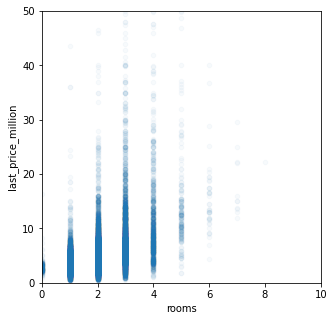

In [109]:
(
    data.
    plot(x='rooms', y='last_price_million', ylim = (0,50), xlim = (0, 10), kind='scatter', alpha=0.03, figsize=(5,5)) 
)

Мы видим,что зависимость практически не видна

Изучим зависимость цены от типа этажа

AxesSubplot(0.125,0.125;0.775x0.755)


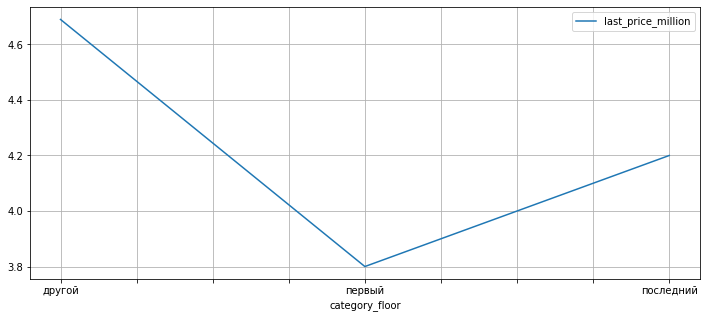

In [110]:
print(data.pivot_table(index = 'category_floor', values = 'last_price_million', aggfunc = 'median').plot(grid=True, figsize=(12, 5)))

Мы видим, что медианная цена продажи квартир категории этажа "другой" выше, а медианнцая цена продаж на первом этаже самая низкая

Изучим зависимость цены от дня недели размещения объявления

In [111]:
print(data['weekday'].corr(data['last_price_million']))

-0.007404205047750803


Коэффициент корреляции практически равен 0, значит зависимость отсутствует

<AxesSubplot:xlabel='weekday', ylabel='last_price_million'>

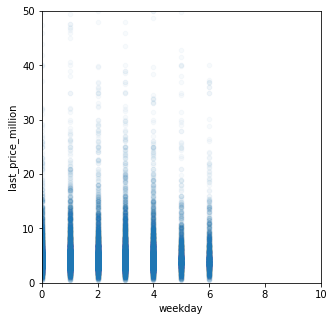

In [112]:
(
    data.
    plot(x='weekday', y='last_price_million', ylim = (0,50), xlim = (0, 10), kind='scatter', alpha=0.03, figsize=(5,5)) 
)

Зависимость между днем недели и ценой продажи отсутствет

Изучим зависимость цены от месяца размещения объявления

In [113]:
print(data['month'].corr(data['last_price_million']))

0.008714726483100248


Коэффициент корреляции практически равен 0, значит зависимость отсутствует

Изучим зависимость цены от года размещения объявления

In [114]:
print(data['year'].corr(data['last_price_million']))

-0.0652236987919122


Коэффициент корреляции практически равен 0, значит зависимость отсутствует

В ходе исследования мы вы выяснили, что цена продажи квартиры больше всего зависит от общей площади квартиры

Создадим переменную top_ten_locality_name, в которую передадим 10 населенных пунктов с наибольшим количеством объявлений

Сначала присвоим каждому объявлению уникальный id

In [115]:
id_number = range(0, len(data))
data['id'] = id_number

In [116]:
top_ten_locality_name = data.pivot_table(index = 'locality_name', values = ['square meter', 'id'], aggfunc = 'sum')
print(top_ten_locality_name)

                           id  square meter
locality_name                              
Бокситогорск           131074  2.400492e+05
Волосово               370491  1.247505e+06
Волхов                 834918  2.965075e+06
Всеволожск            3709636  2.324544e+07
Выборг                2103304  1.187359e+07
...                       ...           ...
село Путилово           12148  7.984352e+04
село Рождествено        21043  6.910777e+04
село Русско-Высоцкое    88709  4.220750e+05
село Старая Ладога       3955  3.272727e+04
село Шум                13183  3.389831e+04

[329 rows x 2 columns]


Отсортируем таблицу по количеству объявлений и оставим топ 10

In [117]:
top_ten_locality_name = top_ten_locality_name.sort_values(by = 'id', ascending=False)
top_ten_locality_name = top_ten_locality_name[:10]


добавим столбец square_meter_price

In [118]:
top_ten_locality_name['square_meter_mean'] = top_ten_locality_name['square meter'] / top_ten_locality_name['id']
top_ten_locality_name

,id,square meter,square_meter_mean
locality_name,,,
Санкт-Петербург,135237571,1.489935e+09,11.017170
посeлок Мурино,5313519,4.415556e+07,8.310040
посeлок Шушары,3942628,3.169415e+07,8.038838
Всеволожск,3709636,2.324544e+07,6.266232
Колпино,3185693,2.295235e+07,7.204820
деревня Кудрово,3116255,2.764959e+07,8.872698
Пушкин,3049311,3.082009e+07,10.107230
посeлок Парголово,2818273,2.699132e+07,9.577254
Гатчина,2651590,1.820479e+07,6.865613


Самая высокая стоимость квадратного метра в Санкт-Петербурге, почти такая же цена в Пушкине, жить рядом с Екатериновским дворцом - очень дорого,самая низкая - в Выборге

Выделим данные о квартирах, которые родавали в Санкт-Петербурге в таблицу peterburg

In [119]:
peterburg = data.query('locality_name == "Санкт-Петербург"')


Добавим столбец kilometr_price и рассчитаем его среднее значение

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Упс, появились предпреждения. Для борьбы с ними могу посоветовать такой прием:
    
    import warnings

    warnings.filterwarnings("ignore")

In [120]:
peterburg['kilometr_price'] = peterburg['last_price']/ (peterburg['city_centers_nearest'] /1000)
peterburg

/tmp/ipykernel_58/4224469864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peterburg['kilometr_price'] = peterburg['last_price']/ (peterburg['city_centers_nearest'] /1000)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_area_area,square meter,city_centers_nearest_kilometrs,weekday,month,year,category_floor,last_price_million,id,kilometr_price
1,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,NaN,92785.714286,13.933,3,8,2015,другой,5.196,1,3.729276e+05
2,0,64900000.0,159.00,2015-07-24,3,2.65,14,96.032944,9,False,...,NaN,408176.100629,6.800,4,7,2015,другой,64.900,2,9.544118e+06
3,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,NaN,100000.000000,8.098,1,6,2018,другой,10.000,3,1.234873e+06
7,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,NaN,88524.590164,15.008,6,2,2017,другой,5.400,7,3.598081e+05
8,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,NaN,127525.252525,13.878,3,11,2017,другой,5.050,8,3.638853e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20207,19,9200000.0,101.00,2019-04-01,3,3.05,15,63.000000,12,False,...,NaN,91089.108911,14.428,0,4,2019,другой,9.200,20207,6.376490e+05
20208,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.300000,4,False,...,NaN,100566.572238,16.081,2,2,2018,другой,3.550,20208,2.207574e+05
20209,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.000000,2,False,...,NaN,105769.230769,6.263,3,7,2018,другой,5.500,20209,8.781734e+05
20210,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.300000,7,False,...,NaN,129903.978052,4.489,3,10,2016,другой,9.470,20210,2.109601e+06


In [121]:
print(peterburg['kilometr_price'].mean())

1113704.472724627


In [129]:
print(peterburg['city_centers_nearest'].corr(peterburg['last_price']))

-0.3325970883333254


Удаление на 1 км от ценра города уменьшает стоимость квратиры в среднем на 1 млн 111 тысяч рублей. Корреляция показывает небольшую обратную зависимость

Создадим сводную таблицу, в которую сгруупироуем километры и для каждого параметра посчитаем среднюю цену

,last_price_million
count,5815.000000
mean,6.974783
std,7.093123
min,1.190000
25%,4.200000
50%,5.350000
75%,7.600000
max,330.000000


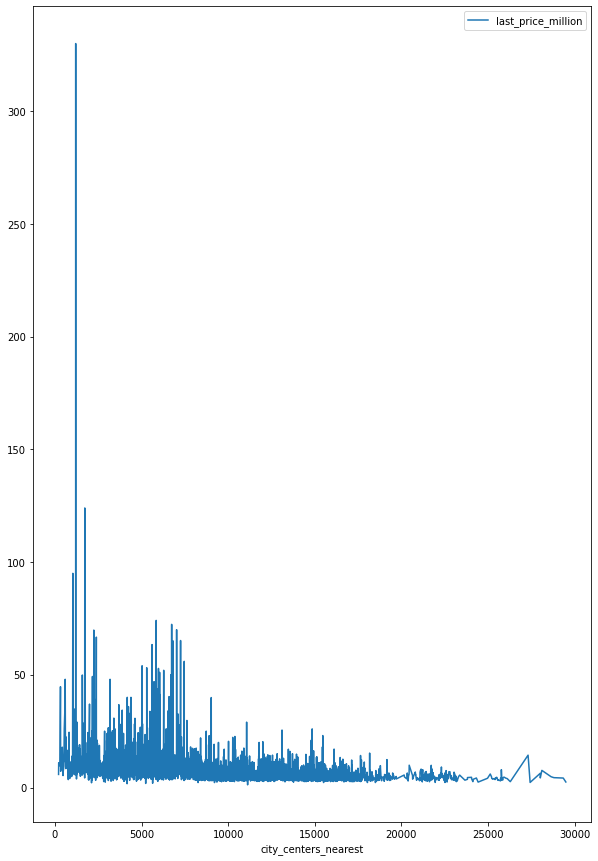

In [146]:
peterburg_centres = peterburg.pivot_table(index = 'city_centers_nearest', values = 'last_price_million', aggfunc = 'mean')
peterburg_centres = peterburg_centres.sort_values(by = 'city_centers_nearest')

(
    peterburg.pivot_table(index = 'city_centers_nearest', values = 'last_price_million', aggfunc = 'mean')
    .plot(figsize = (10,15))
) # Построим график зависимости расстояния до центра от средней цены
peterburg_centres.describe()
peterburg_centres.head()

Уберем аномальные значения и ограничимся суммой в 100 миллионов

<AxesSubplot:xlabel='city_centers_nearest'>

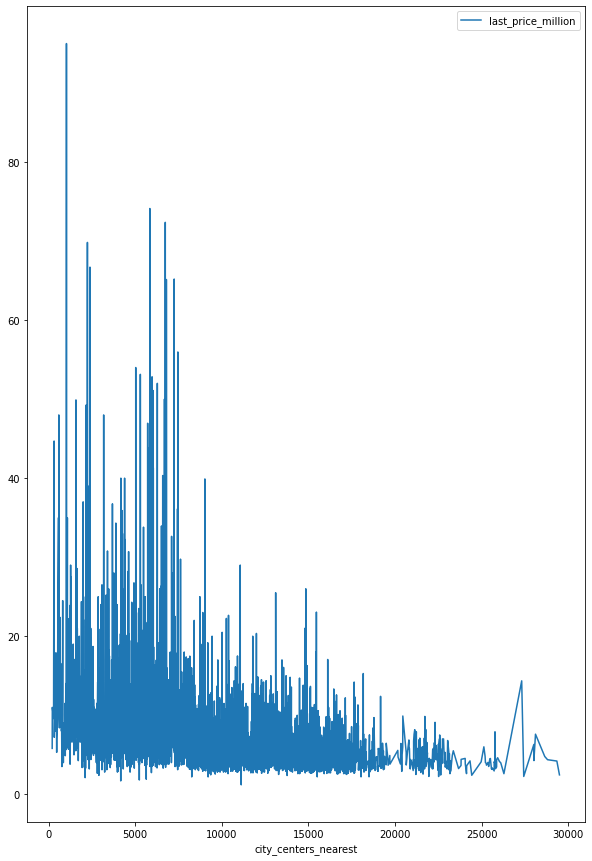

In [148]:
(
    peterburg
    .query('last_price_million < 100')
    .pivot_table(index = 'city_centers_nearest', values = 'last_price_million', aggfunc = 'mean')
    .plot(figsize = (10,15))
)

По графику можно сделать вывод, что при удалении от центра города, квартиры в среднем дешевеют

### Общий вывод

Проанализировав данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько леа стоимость квартир в Ленинградской области, мы выяснили ,что на цену в
больше всего влияют следующие факторы:
- Общая площадь квартиры;
- Жилая площадь квартиры;
- расстояние до центра города (чем дальше от центра, тем ниже цена)
- этажность: исследование показало, что квартиры на "средних" этажах продаются дороже всего, а квартиры на первом этаже стоят дешевле.

Так же мы видим, что дата размещения: год ,месяц, день недели) никак не коррелируется со стоимостью квартры. 
Среднее время продажи квартиры составляет 175,5 дней, в то время как медианное время равно 95 дням ,а чаще всего люди продают свою квартиру за 45 дней.
Как предложение: если есть возможность, то стоит добавить колонку кем продавалась квартира: собственником или через риэлтора. И сравнить цену и сроки продажи. Риэлторы говорят, что продают квартиры быстрее и дороде, чем собственник, интересно проверить так ли это